In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING:

In [2]:
adult=pd.read_csv('/content/adult_with_headers.csv')
adult.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
adult.info()# information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


* The dataset contains 32,561 rows.
* There are both numerical and categorical features.
*  Age, fnlwgt,education_num,	capital_gain,	capital_loss	& hours_per_week columns contain interger data,remaining columns contaion object data.
* There are no missing values in the dataset.

In [4]:
adult.describe()# Statistical description of the dataset

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000


* The capital_gain and capital_loss features have a large standard deviation, indicating potential outliers or skewness.

* The income variable, which is the target variable, has two unique values: <=50K and >50K.

In [5]:
adult.shape#shape of the data

(32561, 15)

In [6]:
adult.isnull().sum()#checking for null values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

No null values available in the data set. So, we not need to perform any performance for the null values.

In [7]:
adult.duplicated().sum()#checking for duplicate values

24

In [8]:
adult[adult.duplicated()]#Showing All duplicates rows

age          workclass  fnlwgt      education  education_num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital_status          occupation    relationship  \
4881         Never-married        Craft-repair   Not-in-family   
5104         Never-married       Other-service   Not-in-family   
9171         Never-married      Prof-specialty       Own-child   
11631        Never-married        Tech-support   Not-in-family   
13084        Never-married     Priv-house-serv   Not-in-family   
15059        Never-married     Farming-fishing   Not-in-family   
17040   Married-civ-spouse        Craft-repair         Husband   
18555        Never-married       Other-service   Not-in-family   
18698        Never-married     Farming-fishing   Not-in-family   
21318        Never-married        Adm-clerical       Own-child   
21490        Never-married     Exec-managerial       Own-child   
21875   Married-civ-spouse        Craft-repair         Husband   
22300        Never-married     Priv-house-serv   Not-in-family   
22367        Never-married      Prof-specialty   Not-in-family   
22494   Married-civ-spouse        Craft-repair         Husband   
25872        Never-married   Handlers-cleaners   Not-in-family   
26313        Never-married      Prof-specialty   Not-in-family   
28230        Never-married   Machine-op-inspct   Not-in-family   
28522   Married-civ-spouse      Prof-specialty         Husband   
28846   Married-civ-spouse        Craft-repair         Husband   
29157   Married-civ-spouse   Machine-op-inspct         Husband   
30845             Divorced        Adm-clerical       Unmarried   
31993        Never-married       Other-service       Own-child   
32404             Divorced       Other-service   Not-in-family   

                      race      sex  capital_gain  capital_loss  \
4881                 White     Male             0             0   
5104    Asian-Pac-Islander     Male             0             0   
9171                 White   Female             0             0   
11631                White   Female             0             0   
13084                White   Female             0             0   
15059                White     Male             0             0   
17040                White     Male             0             0   
18555                Black     Male         

In [9]:
adult=adult.drop_duplicates()#removing duplicates

age,	fnlwgt,	education_num,	capital_gain,	capital_loss &	hours_per_week ,These are the numerical columns.

In [10]:
adult_categorical=adult.select_dtypes(include=['object'])#selecting numerical columns
adult_categorical.head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  income  
0   Not-in-family   White     Male   United-States   <=50K  
1         Husband   White     Male   United-States   <=50K  
2   Not-in-family   White     Male   United-States   <=50K  
3         Husband   Black     Male   United-States   <=50K  
4            Wife   Black   Female            Cuba   <=50K

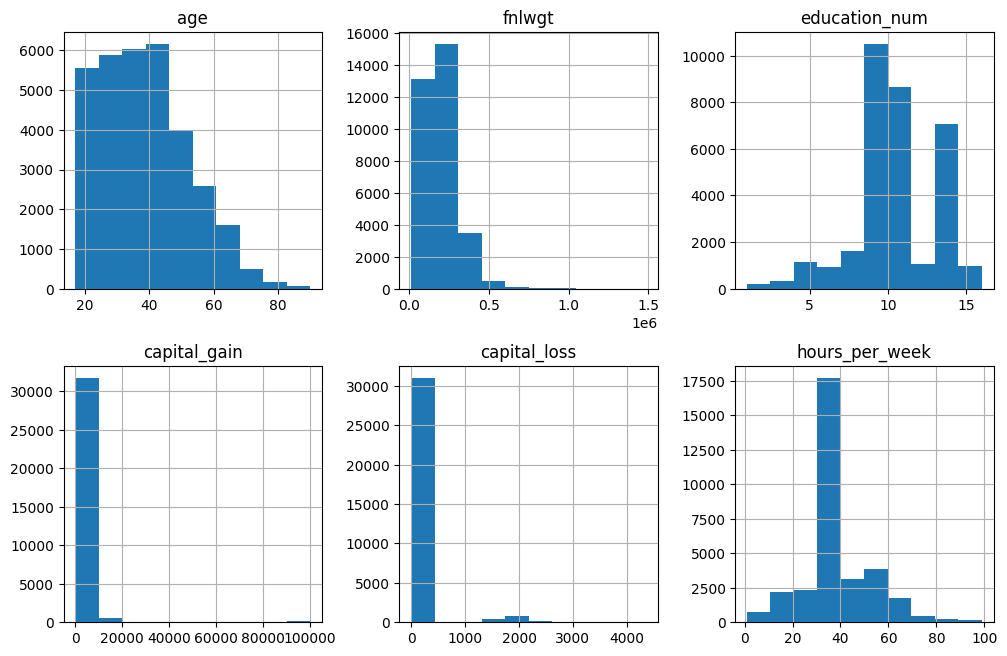

In [8]:
adult[adult.describe().columns].hist(figsize=(12,12), layout=(3,3), sharex=False);
plt.show()

In [9]:
!pip install klib

In [11]:
for i in adult_categorical.columns:
  print(i)
  print(adult[i].value_counts())

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64
marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
occupation
 Prof-specialty       41

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


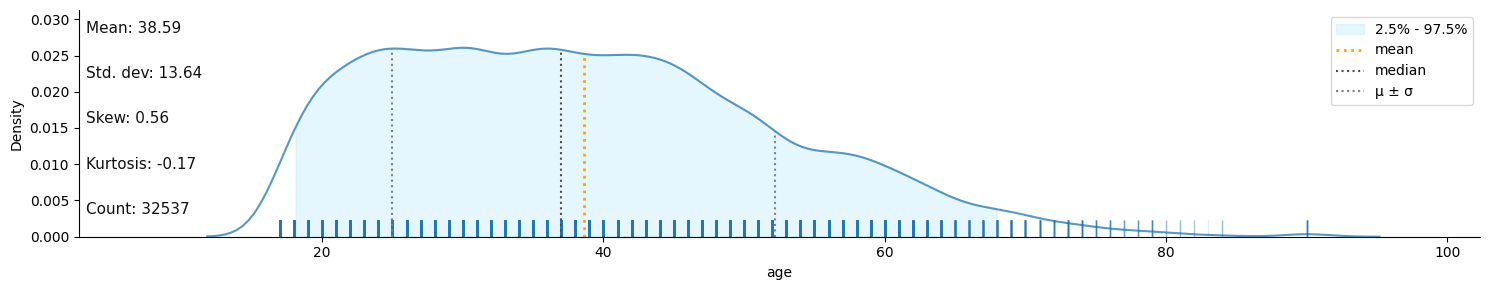

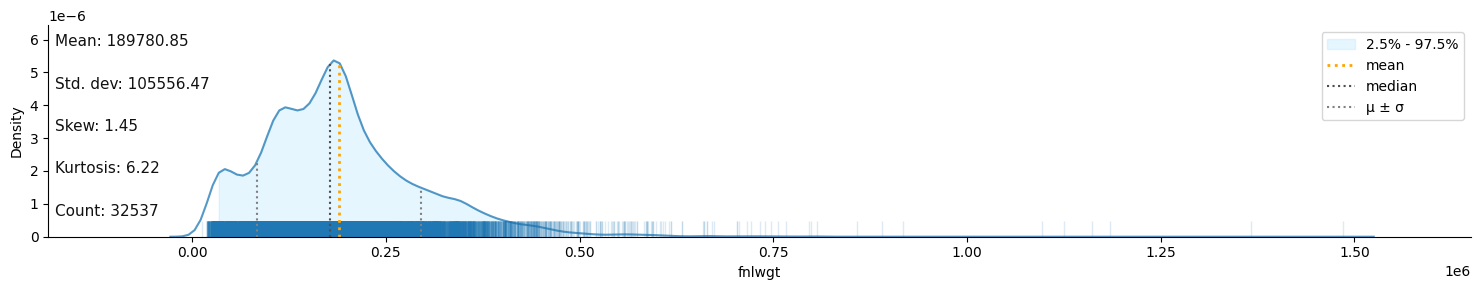

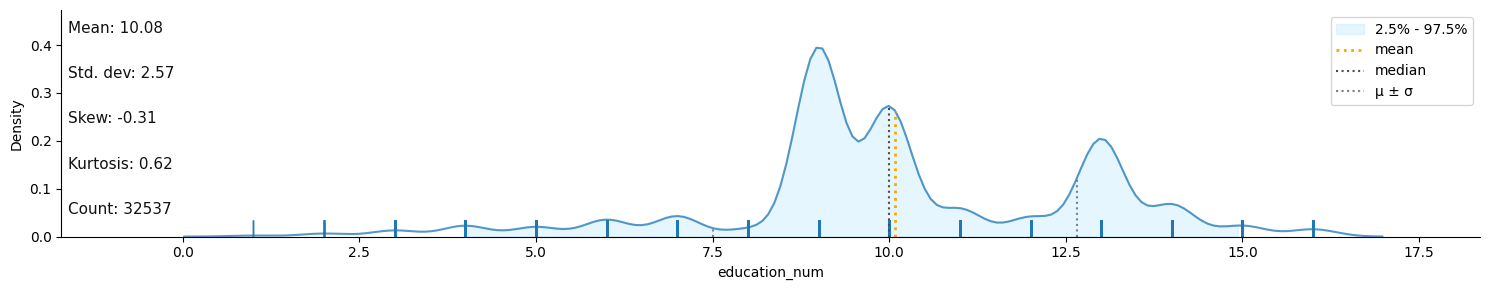

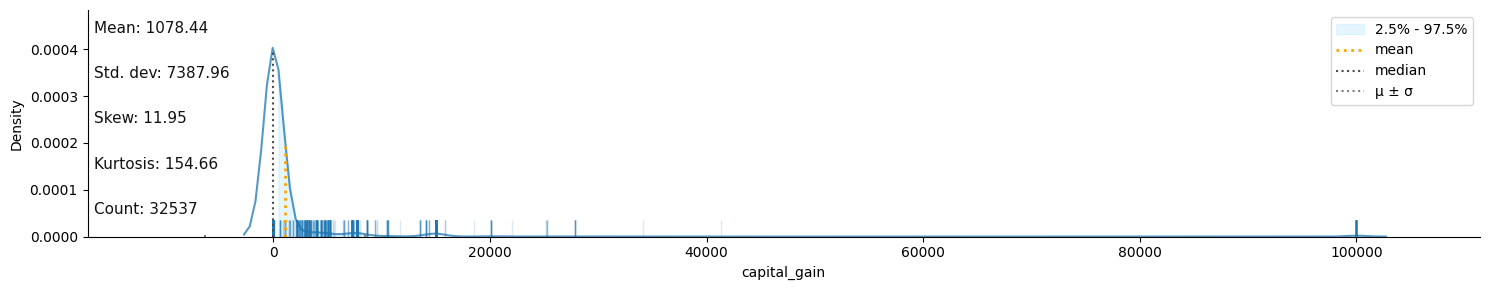

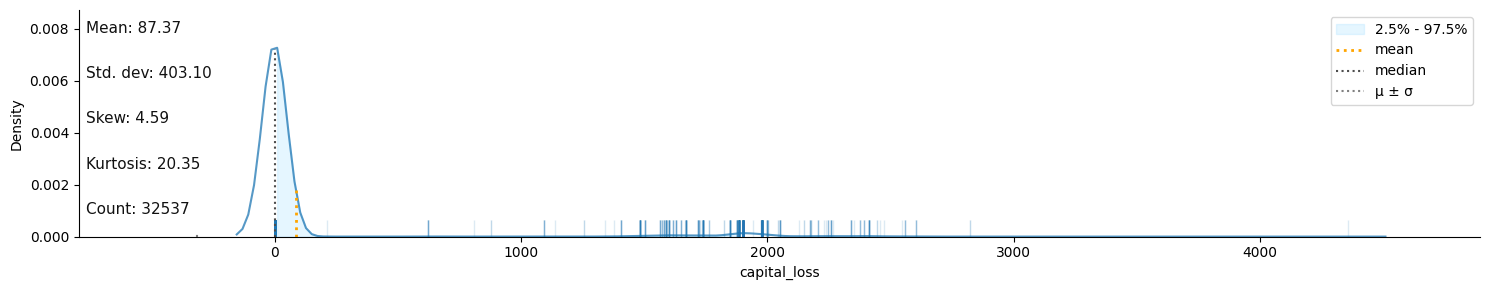

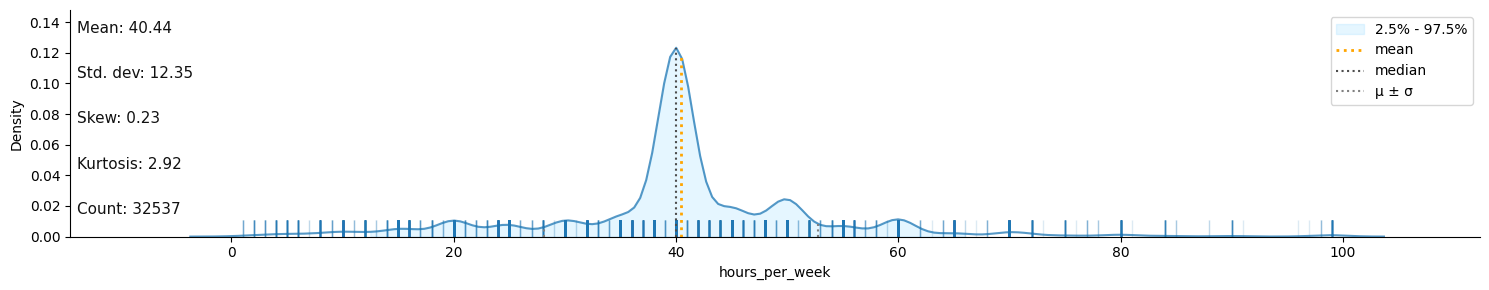

In [13]:
for i in adult.describe().columns:
  klib.dist_plot(adult[i])

GridSpec(6, 9)

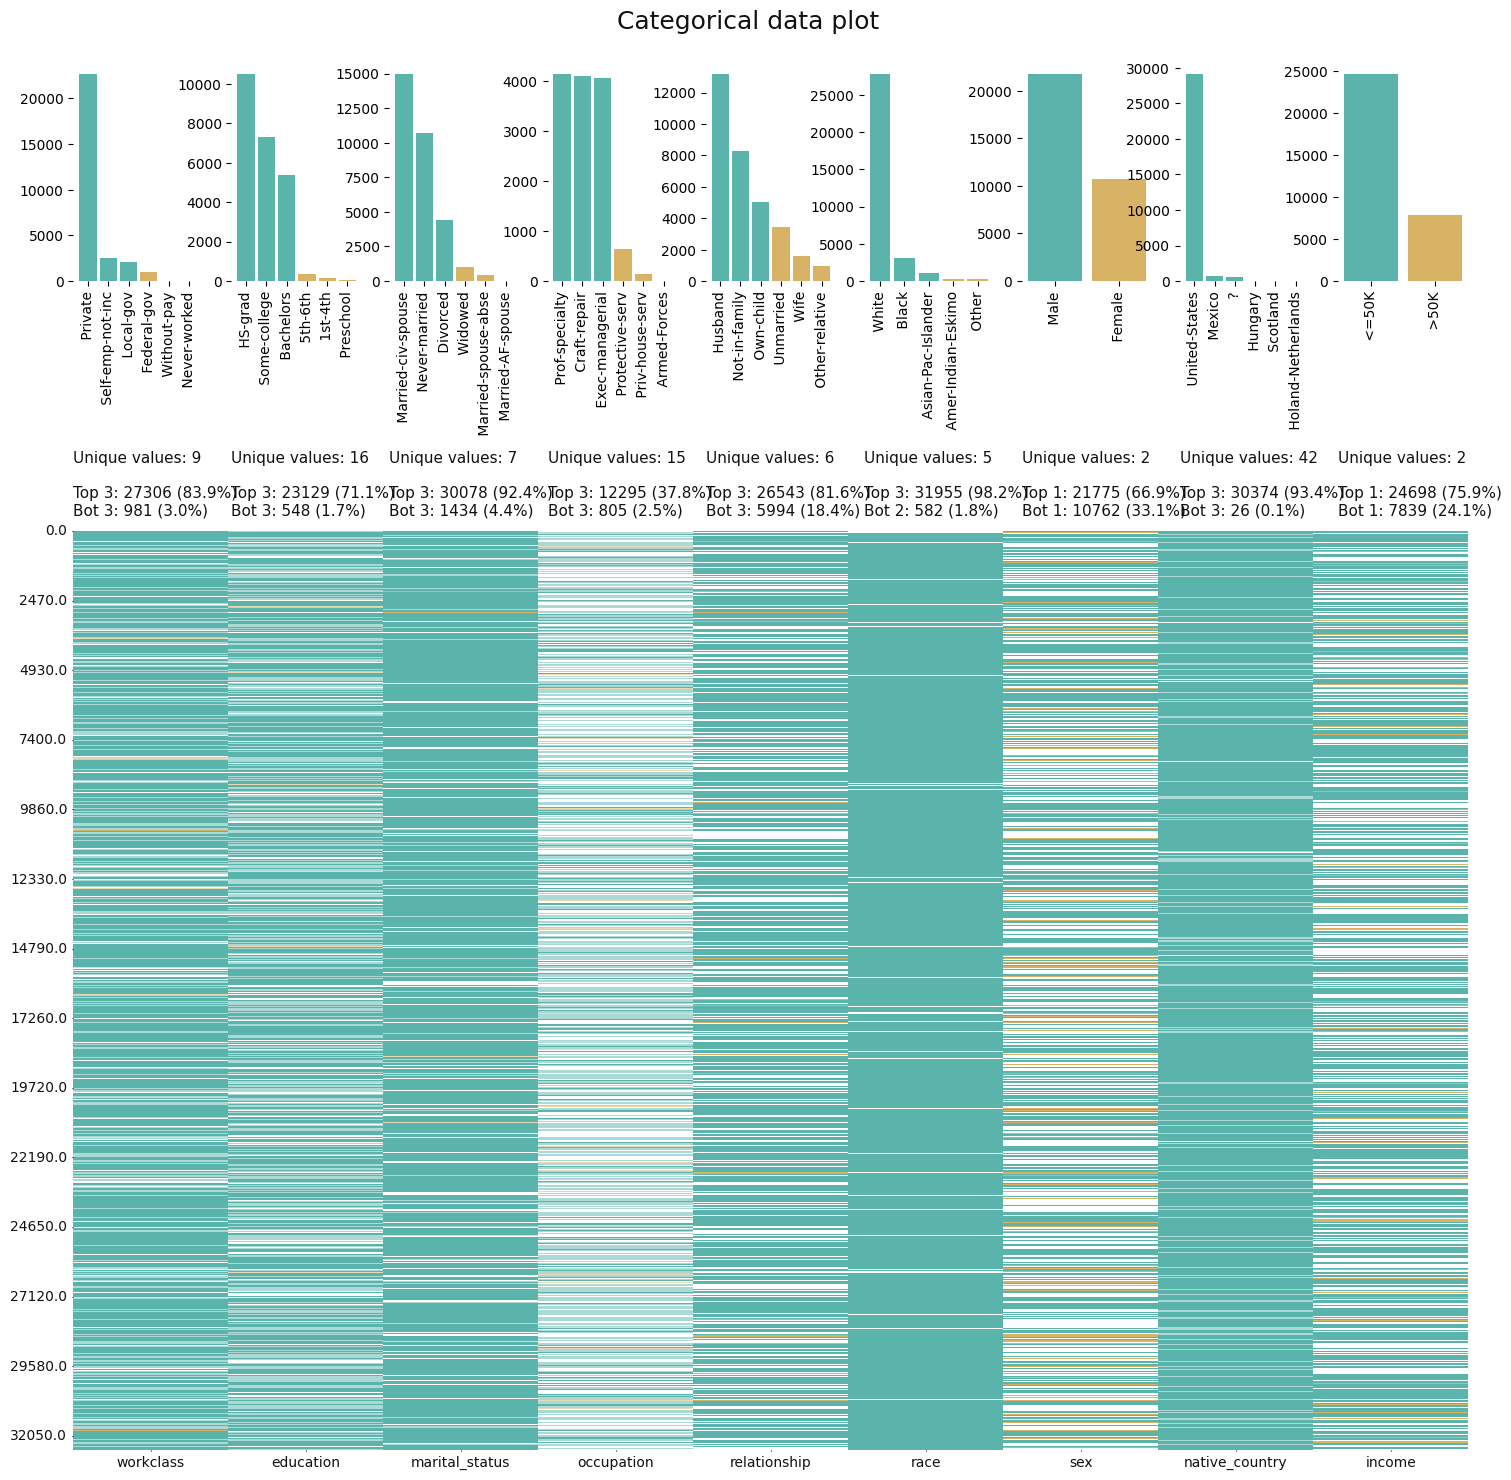

In [14]:
import klib
klib.cat_plot(adult)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

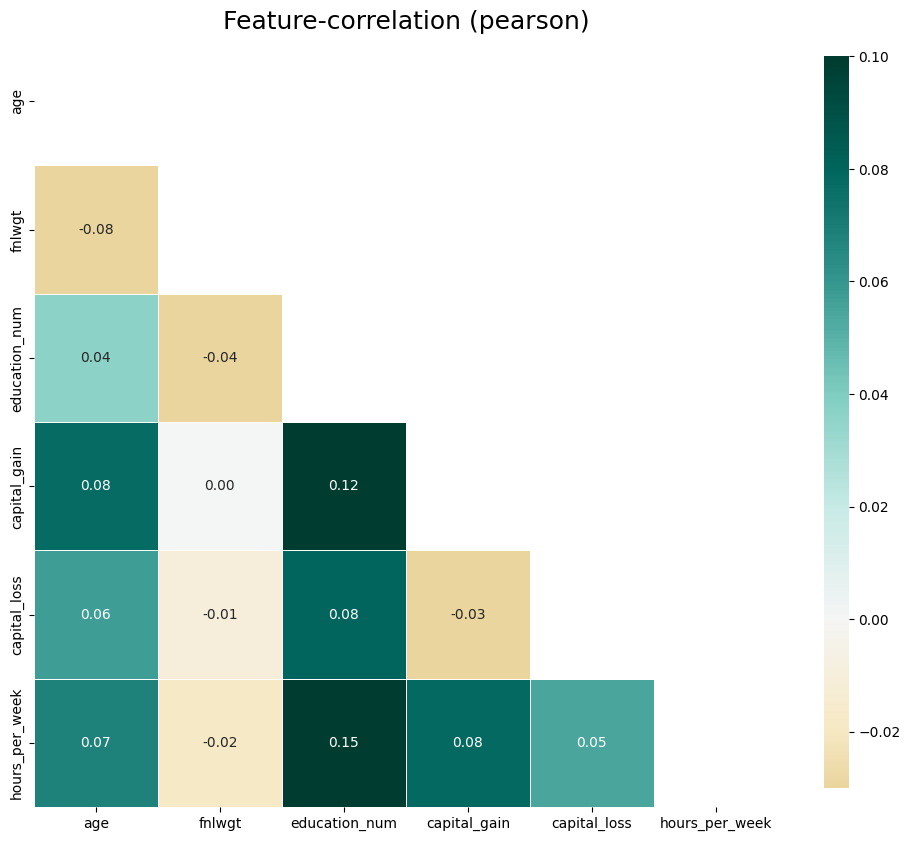

In [12]:
import klib
klib.corr_plot(adult)

In [16]:
!pip install dataprep

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of 

Computing series-sum-chunk-a061b610235398a42ea001ddf27cd55c-c69a87a4ff09d66d2d590a4a7561b84e:  78%|███████▊  | 1552/1994 [00:01<00:00, 1281.42it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.a

DataPrep Report
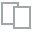
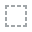
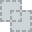
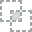
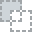
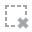
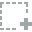
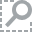
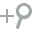
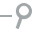
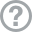
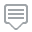
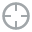
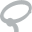
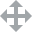
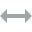
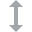
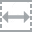
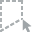
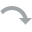
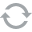
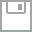
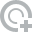
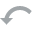
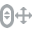
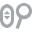
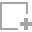
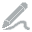
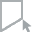
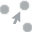
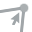
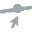

In [15]:
from dataprep.eda import create_report
create_report(adult)

In [16]:
adult['capital_diff'] = adult['capital_gain'] - adult['capital_loss']
adult['work_experience'] = adult['age'] - adult['education_num'] - 5
adult.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0              40   United-States   <=50K   
1             0             0              13   United-States   <=50K   
2             0             0              40   United-States   <=50K   
3             0             0              40   United-States   <=50K   
4             0             0              40            Cuba   <=50K   

   capital_diff  work_experience  
0          2174               21  
1             0               32  
2             0               24  
3             0               41  
4             0               10

#Why These Features Might Be Beneficial
* **Capital Difference:**
This feature directly represents the financial impact of capital transactions, making it easier for the model to learn whether these transactions have a significant impact on income. It combines two features into one, reducing the complexity the model has to handle.

* **Work Experience:**
Work experience is a critical factor in determining income. More experienced workers are typically paid more, so this feature provides a direct estimate of experience, which might have a strong correlation with income. This feature also helps to contextualize the age and education_num features by showing how they interact to impact income.



In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [18]:
sc=StandardScaler()
mm=MinMaxScaler()
le=LabelEncoder()

In [19]:
adult['age']=sc.fit_transform(adult[['age']])
adult['hours_per_week']=sc.fit_transform(adult[['hours_per_week']])
adult.head()

age          workclass  fnlwgt   education  education_num  \
0  0.030390          State-gov   77516   Bachelors             13   
1  0.836973   Self-emp-not-inc   83311   Bachelors             13   
2 -0.042936            Private  215646     HS-grad              9   
3  1.056950            Private  234721        11th              7   
4 -0.776193            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0       -0.035664   United-States   <=50K   
1             0             0       -2.222483   United-States   <=50K   
2             0             0       -0.035664   United-States   <=50K   
3             0             0       -0.035664   United-States   <=50K   
4             0             0       -0.035664            Cuba   <=50K   

   capital_diff  work_experience  
0          2174               21  
1             0               32  
2             0               24  
3             0               41  
4             0               10

In [20]:
adult['fnlwgt']=mm.fit_transform(adult[['fnlwgt']])
adult['education_num']=mm.fit_transform(adult[['education_num']])
adult['capital_gain']=mm.fit_transform(adult[['capital_gain']])
adult['capital_loss']=mm.fit_transform(adult[['capital_loss']])
adult.head()

age          workclass    fnlwgt   education  education_num  \
0  0.030390          State-gov  0.044302   Bachelors       0.800000   
1  0.836973   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2 -0.042936            Private  0.138113     HS-grad       0.533333   
3  1.056950            Private  0.151068        11th       0.400000   
4 -0.776193            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0       0.02174           0.0       -0.035664   United-States   <=50K   
1       0.00000           0.0       -2.222483   United-States   <=50K   
2       0.00000           0.0       -0.035664   United-States   <=50K   
3       0.00000           0.0       -0.035664   United-States   <=50K   
4       0.00000           0.0       -0.035664            Cuba   <=50K   

   capital_diff  work_experience  
0          2174               21  
1             0               32  
2             0               24  
3             0               41  
4             0               10

These are the categorical columns-workclass,	education	,marital_status	occupation	,relationship	,race	,sex,	native_country &	income.


# **Scaling Techniques** :

 Data scaling is a data processing step for Numerical feactures in machine learning.

#•	Standard Scaling:

* Standard Scalling transforms the data to have a mean of 0 and standard vediation of 1.
* This technique is useful when features have different scales and we want to ensure that each feature contributes equally to the model.

#	Min-Max Scaling

* Min-Max Scaling transforms the data to a fixed range, typically [0, 1].
* This scaling technique is useful when you want to normalize the data without distorting the relative differences in the values.



In [21]:
adult_numerical=adult.select_dtypes(include=['int64','float64'])#selecting numerical columns
adult_numerical.head()

age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030390  0.044302       0.800000       0.02174           0.0   
1  0.836973  0.048238       0.800000       0.00000           0.0   
2 -0.042936  0.138113       0.533333       0.00000           0.0   
3  1.056950  0.151068       0.400000       0.00000           0.0   
4 -0.776193  0.221488       0.800000       0.00000           0.0   

   hours_per_week  capital_diff  work_experience  
0       -0.035664          2174               21  
1       -2.222483             0               32  
2       -0.035664             0               24  
3       -0.035664             0               41  
4       -0.035664             0               10

(array([1.3107e+04, 1.5316e+04, 3.4950e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([-1.68155087, -0.28661733,  1.10831622,  2.50324977,  3.89818332,
         5.29311687,  6.68805042,  8.08298397,  9.47791752, 10.87285107,
        12.26778462]),
 <BarContainer object of 10 artists>)

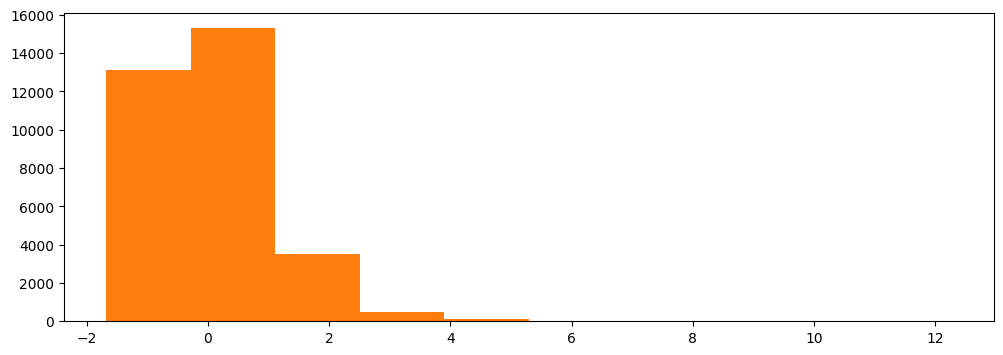

In [23]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(adult_numerical)

ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

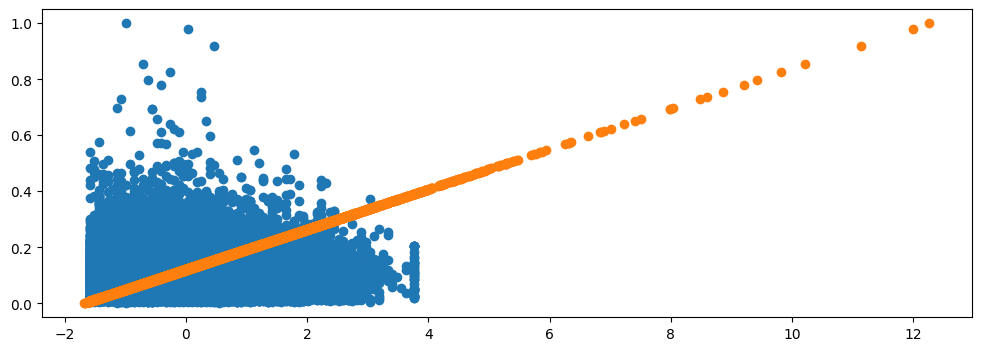

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = StandardScaler()
x_std = scaler.fit_transform(adult_numerical)
y=adult['fnlwgt'].values

ax.scatter(x_std[:,0],y )
ax.scatter(x_std[:,1],y )

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(adult_numerical)
scaled_data=model.transform(adult_numerical)
print(scaled_data)

[[0.30136986 0.0443019  0.8        0.02174022 0.         0.39795918]
 [0.45205479 0.0482376  0.8        0.         0.         0.12244898]
 [0.28767123 0.13811345 0.53333333 0.         0.         0.39795918]
 ...
 [0.56164384 0.09482688 0.53333333 0.         0.         0.39795918]
 [0.06849315 0.12849934 0.53333333 0.         0.         0.19387755]
 [0.47945205 0.18720338 0.53333333 0.1502415  0.         0.39795918]]


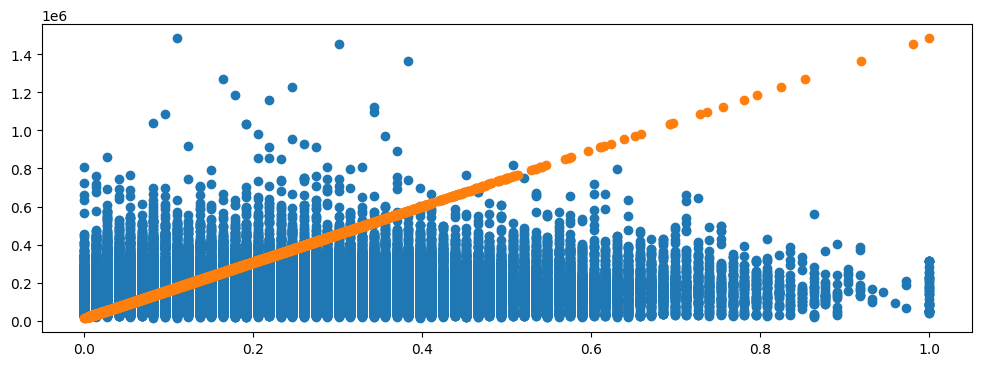

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(adult_numerical)
y=adult['fnlwgt'].values

ax.scatter(x_minmax [:,0], y)
ax.scatter(x_minmax [:,1], y)

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

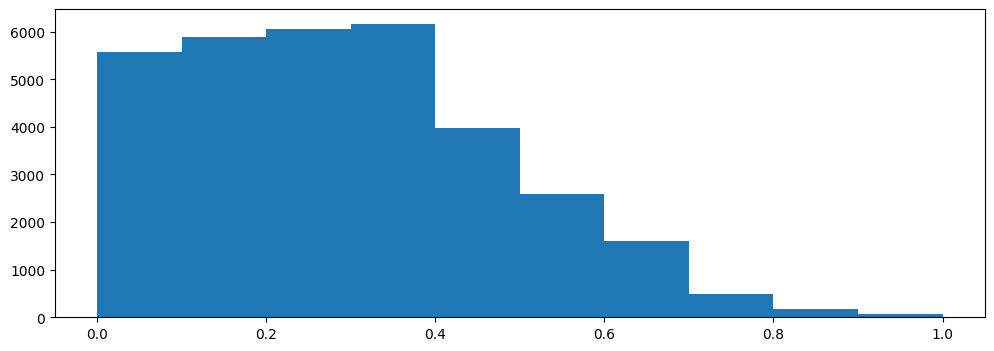

In [ ]:

fig, ax = plt.subplots(figsize=(12, 4))

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(adult_numerical)

ax.hist(x_minmax [:,0])

In [27]:
list1 = []
for i in adult.select_dtypes('object').columns:
    if adult[i].nunique() > 5:
        adult[i] = le.fit_transform(adult[[i]])
    else:
        list1.append(i)

adult.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7  0.044302          9       0.800000               4   
1  0.836973          6  0.048238          9       0.800000               2   
2 -0.042936          4  0.138113         11       0.533333               0   
3  1.056950          4  0.151068          1       0.400000               2   
4 -0.776193          4  0.221488          9       0.800000               2   

   occupation  relationship    race      sex  capital_gain  capital_loss  \
0           1             1   White     Male       0.02174           0.0   
1           4             0   White     Male       0.00000           0.0   
2           6             1   White     Male       0.00000           0.0   
3           6             0   Black     Male       0.00000           0.0   
4          10             5   Black   Female       0.00000           0.0   

   hours_per_week  native_country  income  capital_diff  work_experience  
0       -0.035664              39   <=50K          2174               21  
1       -2.222483              39   <=50K             0               32  
2       -0.035664              39   <=50K             0               24  
3       -0.035664              39   <=50K             0               41  
4       -0.035664               5   <=50K             0               10

In [28]:
list1

['race', 'sex', 'income']

In [29]:
race=pd.get_dummies(adult['race'],drop_first=True)
race.head()

Asian-Pac-Islander   Black   Other   White
0                    0       0       0       1
1                    0       0       0       1
2                    0       0       0       1
3                    0       1       0       0
4                    0       1       0       0

In [30]:
sex = pd.get_dummies(adult['sex'], drop_first=True)
sex.head()

Male
0      1
1      1
2      1
3      1
4      0

In [31]:
income = pd.get_dummies(adult['income'], drop_first=True)
income.head()

>50K
0      0
1      0
2      0
3      0
4      0

In [32]:
adult = pd.concat([adult, race, sex, income], axis=1)
adult.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7  0.044302          9       0.800000               4   
1  0.836973          6  0.048238          9       0.800000               2   
2 -0.042936          4  0.138113         11       0.533333               0   
3  1.056950          4  0.151068          1       0.400000               2   
4 -0.776193          4  0.221488          9       0.800000               2   

   occupation  relationship    race      sex  ...  native_country  income  \
0           1             1   White     Male  ...              39   <=50K   
1           4             0   White     Male  ...              39   <=50K   
2           6             1   White     Male  ...              39   <=50K   
3           6             0   Black     Male  ...              39   <=50K   
4          10             5   Black   Female  ...               5   <=50K   

   capital_diff  work_experience  Asian-Pac-Islander   Black   Other   White  \
0          2174               21                   0       0       0       1   
1             0               32                   0       0       0       1   
2             0               24                   0       0       0       1   
3             0               41                   0       1       0       0   
4             0               10                   0       1       0       0   

    Male   >50K  
0      1      0  
1      1      0  
2      1      0  
3      1      0  
4      0      0  

[5 rows x 23 columns]

In [33]:
adult = adult.drop(['race', 'sex', 'income'], axis=1)
adult.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7  0.044302          9       0.800000               4   
1  0.836973          6  0.048238          9       0.800000               2   
2 -0.042936          4  0.138113         11       0.533333               0   
3  1.056950          4  0.151068          1       0.400000               2   
4 -0.776193          4  0.221488          9       0.800000               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1       0.02174           0.0       -0.035664   
1           4             0       0.00000           0.0       -2.222483   
2           6             1       0.00000           0.0       -0.035664   
3           6             0       0.00000           0.0       -0.035664   
4          10             5       0.00000           0.0       -0.035664   

   native_country  capital_diff  work_experience   Asian-Pac-Islander   Black  \
0              39          2174               21                    0       0   
1              39             0               32                    0       0   
2              39             0               24                    0       0   
3              39             0               41                    0       1   
4               5             0               10                    0       1   

    Other   White   Male   >50K  
0       0       1      1      0  
1       0       1      1      0  
2       0       1      1      0  
3       0       0      1      0  
4       0       0      0      0

#2. Encoding Techniques:


**•	Apply One-Hot Encoding to categorical variables with less than 5 categories.**

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(adult_categorical)
encoded_data

<32537x104 sparse matrix of type '<class 'numpy.float64'>'
	with 292833 stored elements in Compressed Sparse Row format>

# **•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

One Hot Encoding & Lebel Encoding are two fundamental techniques in the machine learnings that allow users to work with categorical variables,which are variables that take on a limited number of values.

**Pros :**

 Label Encoding:



* Label Encoding techniques covert the categorical variables into numericals values based on their order.
* This allows user to maintain the ordinal relationship between categories.
* If the categorical variables has a natural order or hierachy, we can use this to maintain the relationships.
* Its assign each categorical value an integer value based on alphabetical order.

One Hot Encoding:

* One Hot Encoding coverts categories of a categories of a categorical variable into a binary vector of 1 and 0.

* One Hot Encoding to represent the categories as binary vectors.
* Its create new variables that take on values 0 and 1 to represent the original categorical values.

**Cons**:

* Does not add any information that may make the variable more predictive.
* Does not keep the information of ignored lables.

#3. Feature Engineering:

•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [34]:
adult['capital_gain'] = np.log(adult['capital_gain'])
adult.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7  0.044302          9       0.800000               4   
1  0.836973          6  0.048238          9       0.800000               2   
2 -0.042936          4  0.138113         11       0.533333               0   
3  1.056950          4  0.151068          1       0.400000               2   
4 -0.776193          4  0.221488          9       0.800000               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1     -3.828591           0.0       -0.035664   
1           4             0          -inf           0.0       -2.222483   
2           6             1          -inf           0.0       -0.035664   
3           6             0          -inf           0.0       -0.035664   
4          10             5          -inf           0.0       -0.035664   

   native_country  capital_diff  work_experience   Asian-Pac-Islander   Black  \
0              39          2174               21                    0       0   
1              39             0               32                    0       0   
2              39             0               24                    0       0   
3              39             0               41                    0       1   
4               5             0               10                    0       1   

    Other   White   Male   >50K  
0       0       1      1      0  
1       0       1      1      0  
2       0       1      1      0  
3       0       0      1      0  
4       0       0      0      0

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


<Axes: xlabel='capital_gain', ylabel='Density'>

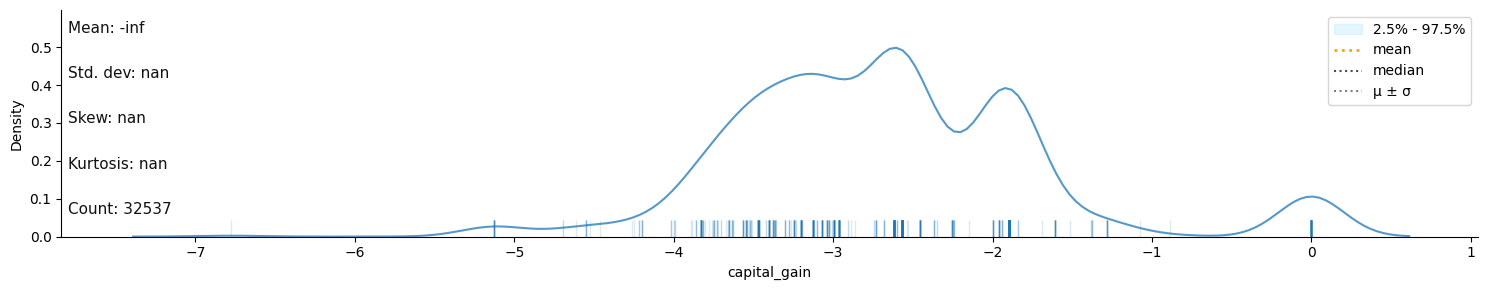

In [35]:
klib.dist_plot(adult['capital_gain'])

In [36]:
adult['capital_gain'] = adult['capital_gain'].replace(-np.inf, np.nan)
min_value = adult['capital_gain'].min()
adult['capital_gain'] = adult['capital_gain'].fillna(min_value)
adult.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7  0.044302          9       0.800000               4   
1  0.836973          6  0.048238          9       0.800000               2   
2 -0.042936          4  0.138113         11       0.533333               0   
3  1.056950          4  0.151068          1       0.400000               2   
4 -0.776193          4  0.221488          9       0.800000               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1     -3.828591           0.0       -0.035664   
1           4             0     -6.776717           0.0       -2.222483   
2           6             1     -6.776717           0.0       -0.035664   
3           6             0     -6.776717           0.0       -0.035664   
4          10             5     -6.776717           0.0       -0.035664   

   native_country  capital_diff  work_experience   Asian-Pac-Islander   Black  \
0              39          2174               21                    0       0   
1              39             0               32                    0       0   
2              39             0               24                    0       0   
3              39             0               41                    0       1   
4               5             0               10                    0       1   

    Other   White   Male   >50K  
0       0       1      1      0  
1       0       1      1      0  
2       0       1      1      0  
3       0       0      1      0  
4       0       0      0      0

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='capital_gain', ylabel='Density'>

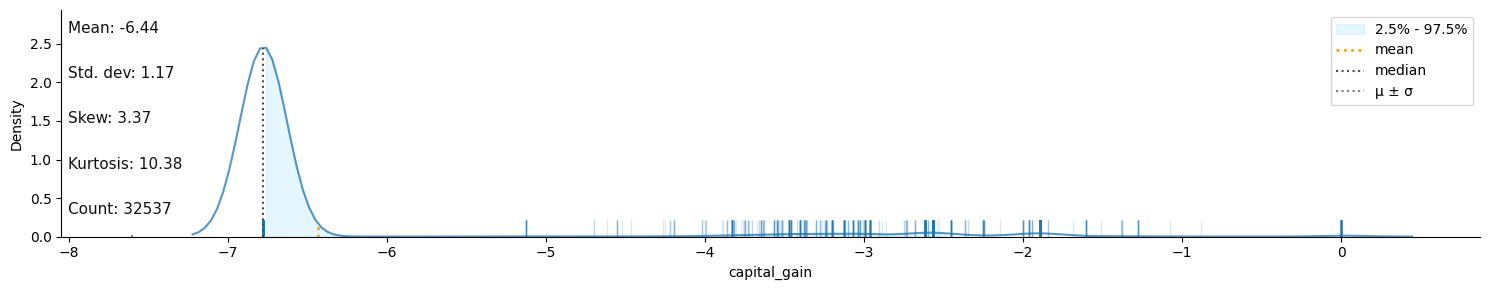

In [37]:
klib.dist_plot(adult['capital_gain'])

# Why Log Transformation for "Capital Gain"?

* The "capital_gain" feature, being highly skewed, likely has many small values and a few very large values. Applying a log transformation can help reduce this skew, making the distribution more normal-like (Gaussian), which many models prefer.

In [38]:
from sklearn.ensemble import IsolationForest

In [39]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(adult)
yhat

array([ 1,  1,  1, ...,  1,  1, -1])

In [40]:
mask = yhat != -1
adult = adult[mask]
adult.head()

age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7  0.044302          9       0.800000               4   
1  0.836973          6  0.048238          9       0.800000               2   
2 -0.042936          4  0.138113         11       0.533333               0   
3  1.056950          4  0.151068          1       0.400000               2   
5 -0.116262          4  0.184932         12       0.866667               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1     -3.828591           0.0       -0.035664   
1           4             0     -6.776717           0.0       -2.222483   
2           6             1     -6.776717           0.0       -0.035664   
3           6             0     -6.776717           0.0       -0.035664   
5           4             5     -6.776717           0.0       -0.035664   

   native_country  capital_diff  work_experience   Asian-Pac-Islander   Black  \
0              39          2174               21                    0       0   
1              39             0               32                    0       0   
2              39             0               24                    0       0   
3              39             0               41                    0       1   
5              39             0               18                    0       0   

    Other   White   Male   >50K  
0       0       1      1      0  
1       0       1      1      0  
2       0       1      1      0  
3       0       0      1      0  
5       0       1      0      0

* Outliers can distort model performance, leading to overfitting, increased variance, and poor generalization.

* Removing outliers can result in a more robust and accurate model, as it allows the model to focus on the general pattern of the data without being misled by extreme values.

In [41]:
!pip install ppscore


  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=75f6dc64a4c0ff95a1ce5a901b2d7be9a0c6dbaba1ef364cce347ae904ba1a74
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [42]:
import ppscore as pps
pp_score = pps.matrix(adult)
pp_score

x              y  ppscore            case  is_valid_score  \
0      age            age      1.0  predict_itself            True   
1      age      workclass      0.0      regression            True   
2      age         fnlwgt      0.0      regression            True   
3      age      education      0.0      regression            True   
4      age  education_num      0.0      regression            True   
..     ...            ...      ...             ...             ...   
395   >50K          Black      0.0      regression            True   
396   >50K          Other      0.0      regression            True   
397   >50K          White      0.0      regression            True   
398   >50K           Male      0.0      regression            True   
399   >50K           >50K      1.0  predict_itself            True   

                  metric  baseline_score  model_score                    model  
0                   None        0.000000     1.000000                     None  
1    mean absolute error        0.706400     0.833299  DecisionTreeRegressor()  
2    mean absolute error        0.050819     0.051423  DecisionTreeRegressor()  
3    mean absolute error        2.606200     2.644531  DecisionTreeRegressor()  
4    mean absolute error        0.119253     0.122488  DecisionTreeRegressor()  
..                   ...             ...          ...                      ...  
395  mean absolute error        0.064800     0.120090  DecisionTreeRegressor()  
396  mean absolute error        0.002800     0.005582  DecisionTreeRegressor()  
397  mean absolute error        0.088000     0.158251  DecisionTreeRegressor()  
398  mean absolute error        0.301600     0.399633  DecisionTreeRegressor()  
399                 None        0.000000     1.000000                     None  

[400 rows x 9 columns]

In [43]:
pp_corr = pd.pivot_table(pp_score, index='x', columns='y', values='ppscore')
pp_corr

y                     >50K   Asian-Pac-Islander     Black      Male   Other  \
x                                                                             
 >50K                  1.0                  0.0  0.000000  0.000000     0.0   
 Asian-Pac-Islander    0.0                  1.0  0.000000  0.000000     0.0   
 Black                 0.0                  0.0  1.000000  0.000000     0.0   
 Male                  0.0                  0.0  0.000000  1.000000     0.0   
 Other                 0.0                  0.0  0.000000  0.000000     1.0   
 White                 0.0                  0.0  0.471313  0.000000     0.0   
age                    0.0                  0.0  0.000000  0.000000     0.0   
capital_diff           0.0                  0.0  0.000000  0.000000     0.0   
capital_gain           0.0                  0.0  0.000000  0.000000     0.0   
capital_loss           0.0                  0.0  0.000000  0.000000     0.0   
education              0.0                  0.0  0.000000  0.000000     0.0   
education_num          0.0                  0.0  0.000000  0.000000     0.0   
fnlwgt                 0.0                  0.0  0.000000  0.000000     0.0   
hours_per_week         0.0                  0.0  0.000000  0.000000     0.0   
marital_status         0.0                  0.0  0.000000  0.000000     0.0   
native_country         0.0                  0.0  0.000000  0.000000     0.0   
occupation             0.0                  0.0  0.000000  0.000000     0.0   
relationship           0.0                  0.0  0.000000  0.159648     0.0   
work_experience        0.0                  0.0  0.000000  0.000000     0.0   
workclass              0.0                  0.0  0.000000  0.000000     0.0   

y                       White       age  capital_diff  capital_gain  \
x                                                                     
 >50K                0.000000  0.037956      0.000000      0.000000   
 Asian-Pac-Islander  0.000000  0.000000      0.000000      0.000000   
 Black               0.485778  0.000000      0.000000      0.000000   
 Male                0.000000  0.004232      0.000000      0.000000   
 Other               0.000000  0.000000      0.000000      0.000000   
 White               1.000000  0.000000      0.000000      0.000000   
age                  0.000000  1.000000      0.000000      0.000000   
capital_diff         0.000000  0.007539      1.000000      0.999131   
capital_gain         0.000000  0.002335      0.713063      1.000000   
capital_loss         0.000000  0.000000      0.000000      0.000000   
education            0.000000  0.020255      0.000000      0.000000   
education_num        0.000000  0.020255      0.000000      0.000000   
fnlwgt               0.000000  0.000000      0.000000      0.000000   
hours_per_week       0.000000  0.005615      0.000000      0.000000   
marital_status       0.000000  0.205464      0.000000      0.000000   
native_country       0.000000  0.000000      0.000000      0.000000   
occupation           0.000000  0.017603      0.000000      0.000000   
relationship         0.000000  0.154817      0.000000      0.000000   
work_experience      0.000000  0.828365      0.000000      0.000000   
workclass            0.000000  0.023646      0.000000      0.000000   

y                    capital_loss  education  education_num  fnlwgt  \
x                                                                     
 >50K                    0.000000        0.0       0.021655     0.0   
 Asian-Pac-Islander      0.000000        0.0       0.000000     0.0   
 Black                   0.000000        0.0       0.000000     0.0   
 Male                    0.000000        0.0       0.000000     0.0   
 Other                   0.000000        0.0       0.000000     0.0   
 White                   0.000000        0.0       0.000000     0.0   
age                      0.000000        0.0       0.000000     0.0   
capital_diff             0.997637        0.0       0.004515

<Axes: xlabel='y', ylabel='x'>

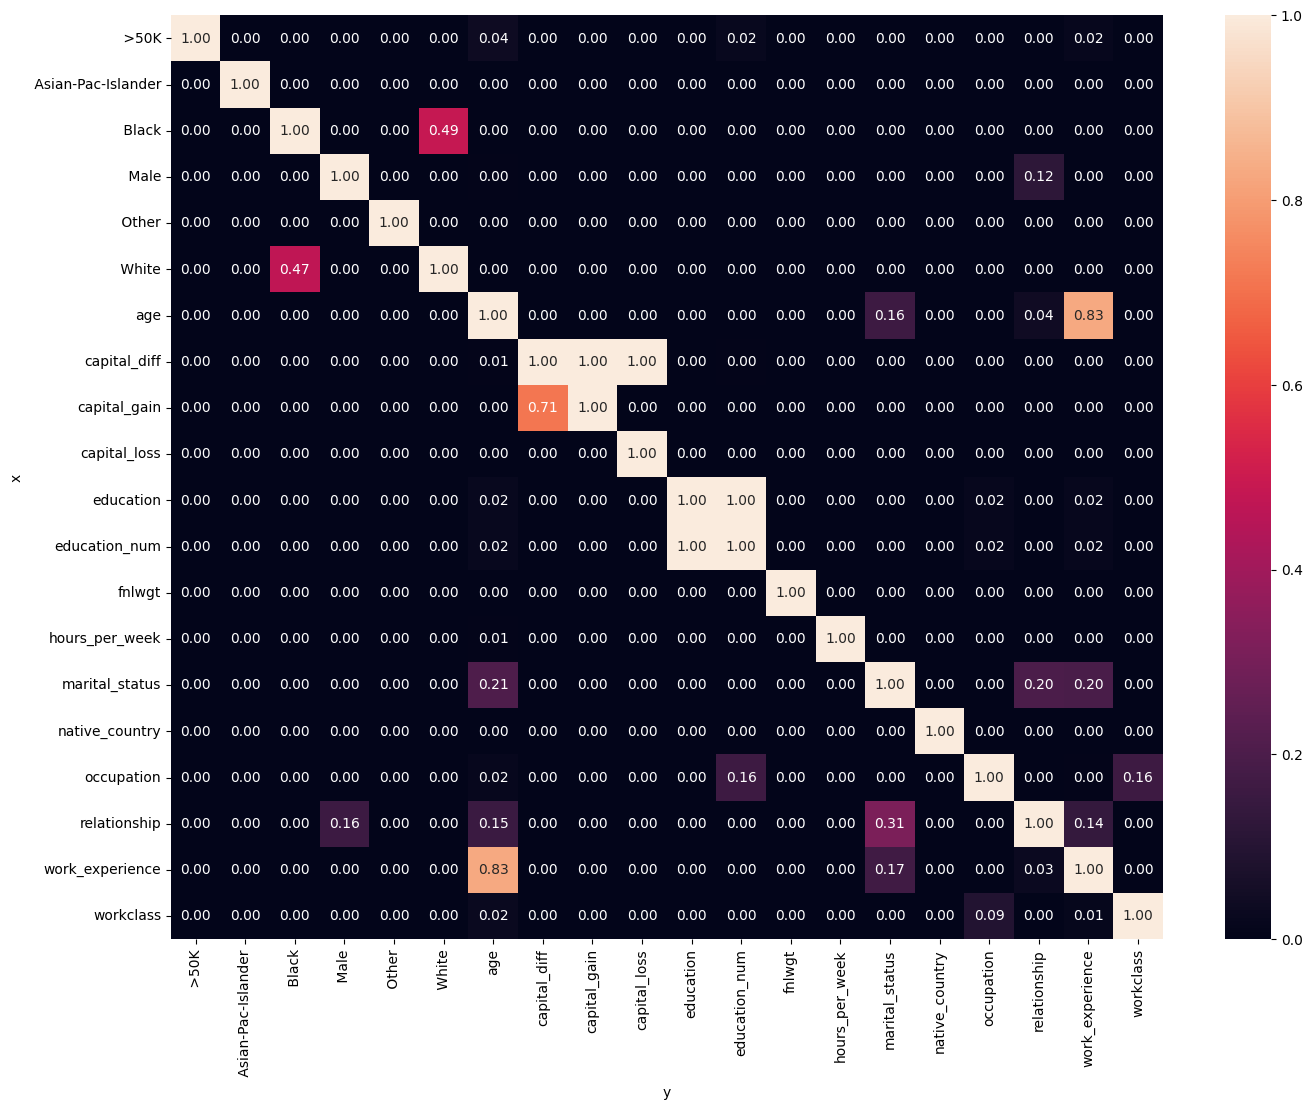

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(pp_corr,annot=True,fmt=".2f")

In [45]:
corr = adult.corr()
corr


age  workclass    fnlwgt  education  education_num  \
age                  1.000000   0.026067 -0.075142   0.007179       0.056973   
workclass            0.026067   1.000000 -0.016510   0.009049       0.034029   
fnlwgt              -0.075142  -0.016510  1.000000  -0.029588      -0.047757   
education            0.007179   0.009049 -0.029588   1.000000       0.325034   
education_num        0.056973   0.034029 -0.047757   0.325034       1.000000   
marital_status      -0.318140  -0.050689  0.032458  -0.022867      -0.049080   
occupation          -0.010237   0.218371  0.003413  -0.023250       0.105801   
relationship        -0.306262  -0.081845  0.003084   0.002734      -0.093916   
capital_gain         0.085227   0.030372 -0.017542   0.023785       0.109029   
capital_loss         0.049478   0.015213 -0.008472   0.024789       0.084593   
hours_per_week       0.095462   0.122554 -0.025661   0.044796       0.138506   
native_country       0.011051  -0.006546 -0.065289   0.067128       0.076313   
capital_diff         0.073203   0.031119 -0.014564   0.015881       0.112144   
work_experience      0.982856   0.019610 -0.065825  -0.052894      -0.128080   
 Asian-Pac-Islander -0.047229   0.007539 -0.038327   0.024951       0.032709   
 Black              -0.058757  -0.023004  0.083496   0.034204      -0.039815   
 Other              -0.035863   0.003452 -0.002629   0.010407      -0.001565   
 White               0.080514   0.022623 -0.038482  -0.041301       0.030547   
 Male                0.120261   0.080315  0.033191  -0.046533      -0.002702   
 >50K                0.240036   0.043953 -0.011331   0.064114       0.320234   

                     marital_status  occupation  relationship  capital_gain  \
age                       -0.318140   -0.010237     -0.306262      0.085227   
workclass                 -0.050689    0.218371     -0.081845      0.030372   
fnlwgt                     0.032458    0.003413      0.003084     -0.017542   
education                 -0.022867   -0.023250      0.002734      0.023785   
education_num             -0.049080    0.105801     -0.093916      0.109029   
marital_status             1.000000   -0.003407      0.206577     -0.062654   
occupation                -0.003407    1.000000     -0.066806      0.017760   
relationship               0.206577   -0.066806      1.000000     -0.136822   
capital_gain              -0.062654    0.017760     -0.136822      1.000000   
capital_loss              -0.048225    0.017615     -0.091628     -0.049017   
hours_per_week            -0.189070    0.064370     -0.255493      0.080781   
native_country            -0.023375   -0.003038      0.010871      0.039366   
capital_diff              -0.047211    0.015475     -0.110761      0.886609   
work_experience           -0.306969   -0.029708     -0.286890      0.064527   
 Asian-Pac-Islander        0.039909    0.002426      0.009423     -0.026257   
 Black                     0.090451    0.023835      0.107686     -0.056890   
 Other                     0.017625    0.004030      0.003932     -0.013273   
 White                    -0.095985   -0.021916     -0.105534      0.064103   
 Male                     -0.128290    0.066420     -0.566975      0.113028   
 >50K                     -0.197088    0.071685     -0.290099      0.244139   

                     capital_loss  hours_per_week  native_country  \
age                      0.049478        0.095462        0.011051   
workclass                0.015213        0.122554       -0.006546   
fnlwgt                  -0.008472       -0.025661       -0.065289   
education                0.024789        0.044796        0.067128   
education_num            0.084593        0.138506        0.076313   
marital_status          -0.048225       -0.189070       -0.023375   
occupation               0.017615        0.064370       -0.003038   
relationship            -0.091628       -0.255493        0.010871   
capital_gain            -0.049017        0.080781        0.03936

<Axes: >

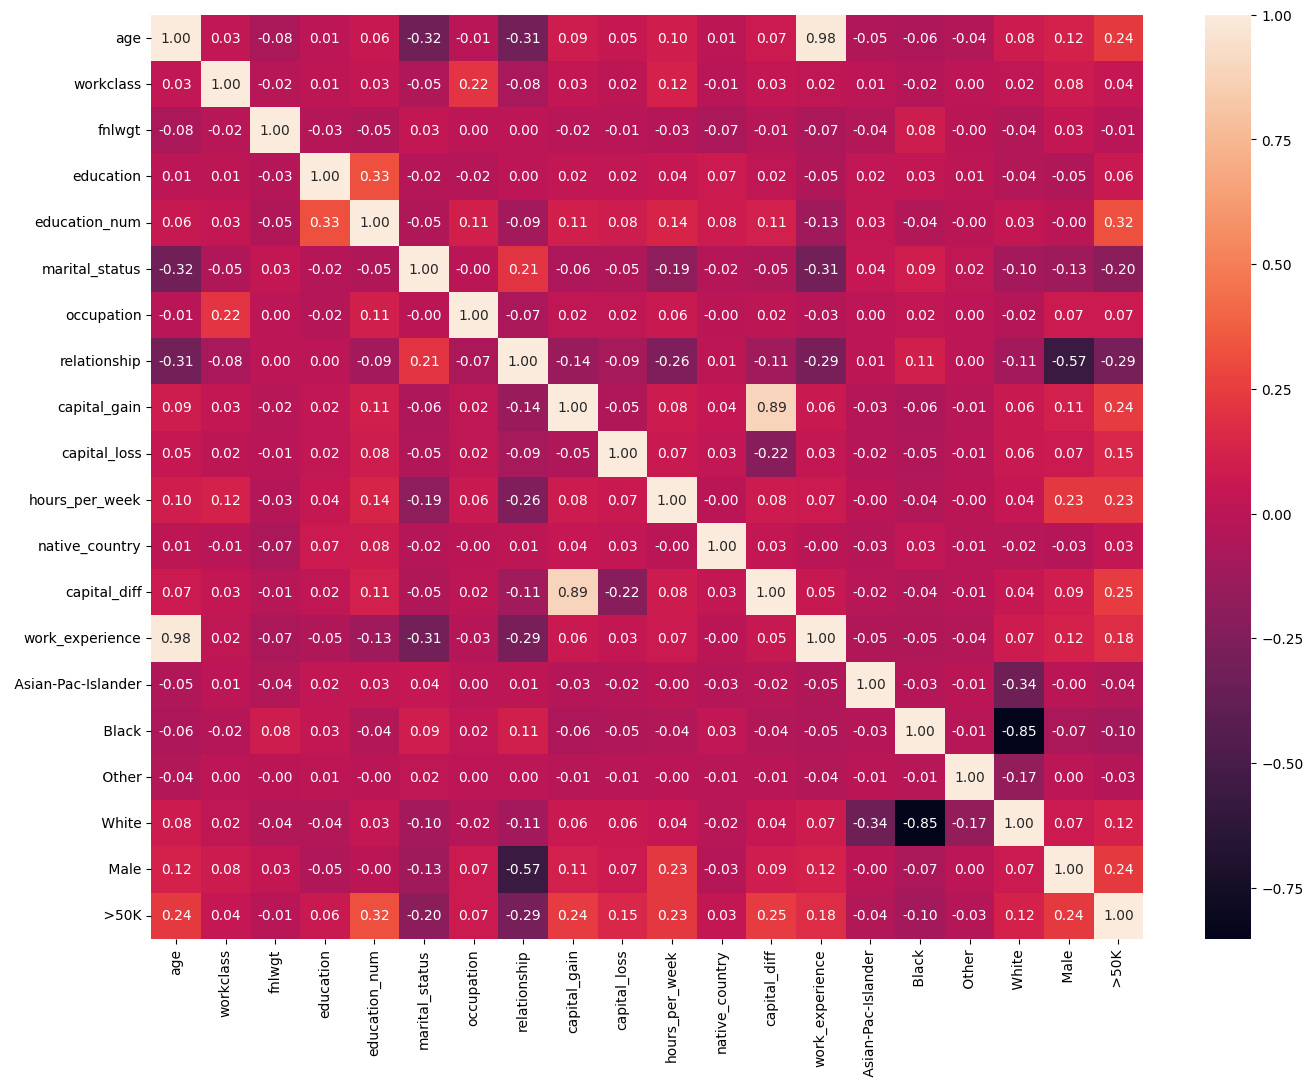

In [46]:
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,fmt=".2f")

### **Comparison and Discussion**

- **Predictive Power vs. Correlation**:
  - Both matrices indicate that features like `education_num` and `age` are influential in predicting higher income (`>50K`). However, the PPS matrix provides insights into the predictive power of these features more directly.
  - Features like `workclass` and `native_country` have low predictive power in the PPS matrix, and this is consistent with their low or negligible correlations in the correlation matrix.

  - **Features with High Correlation but Low Predictive Power**:
  - `age` and `work_experience` have a high correlation (0.983121), but `work_experience` has only a moderate predictive power score (0.173629). This suggests that while `age` and `work_experience` are related, the latter's contribution to predicting income above $50K is less significant.


  - **Feature Relationships**:
  - The correlation matrix shows how features like `education_num` and `education` are perfectly correlated, which makes sense as higher education generally translates to higher education numbers.
  - Negative correlations such as `marital_status` and `relationship` with `>50K` in the correlation matrix indicate that the impact of these features on income might be complex and dependent on other interacting features.



